In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
import sklearn.tree as tree
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image

In [2]:
df = pd.read_csv('combined_data_with_extra_data2.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Run ID,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,ERR1075960,Male,0.0,United States of America,21.22,Health,0.034320,0.320964,0.005633,0.013763,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERR1854747,Male,62.0,United Kingdom,28.70,Health,0.038577,0.204173,0.014874,0.008240,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR688529,Male,63.0,Austria,30.90,Health,0.086423,0.066411,0.026879,0.069596,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR1316059,Male,67.0,United States of America,22.15,Health,0.096800,0.233068,0.009989,0.015105,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR5649200,Male,27.0,United States of America,20.80,Health,0.083754,0.196804,0.058733,0.039295,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,SRR7690181,male,68.0,USA,28.75,Health,0.000000,0.021739,0.000000,0.000000,...,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,SRR7690182,female,69.0,USA,29.05,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,SRR7690183,female,59.0,USA,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,SRR7690184,female,56.0,USA,43.85,Bipolar Disorder,0.000000,0.020000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['Run ID', 'Sex', 'Age', 'Country', 'BMI', 'Condition', 'Alistipes',
       'Bacteroides', 'Bifidobacterium', 'Blautia', 'Clostridium', 'Dorea',
       'Eubacterium', 'Faecalibacterium', 'Oscillibacter', 'Parabacteroides',
       'Roseburia', 'Ruminococcus', 'Unknown', 'Coprococcus', 'Lachnospira',
       'Oscillospira', 'Subdoligranulum', 'Sutterella', 'Anaerostipes',
       'Streptococcus', 'Akkermansia', 'Anaerofilum', 'Anaerotruncus',
       'Bacillus', 'Barnesiella', 'Desulfovibrio', 'Dialister',
       'Erysipelatoclostridium', 'Holdemania', 'Intestinibacter',
       'Lachnoclostridium', 'Lactobacillus', 'Odoribacter', 'Prevotella',
       'Pseudomonas', 'Sporobacter', 'Ruminiclostridium', 'Corynebacterium',
       'Eggerthella', 'Acinetobacter', 'Parasutterella', 'Veillonella',
       'Uncultured Organism', 'Ruminococcaceae', 'Phocaeicola',
       'Paraprevotella', 'Tidjanibacter', 'Flavonifractor',
       'Mediterraneibacter', 'Agathobacter', 'Ligilactobacillus',
       '

In [4]:
df['Ruminococcus'] += df[['Ruminococcaceae']].sum(axis=1)

In [5]:
df = df.drop(['Ruminococcaceae', 'Unknown', 'Uncultured Organism'], axis=1)

In [6]:
df

,Run ID,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,ERR1075960,Male,0.0,United States of America,21.22,Health,0.034320,0.320964,0.005633,0.013763,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERR1854747,Male,62.0,United Kingdom,28.70,Health,0.038577,0.204173,0.014874,0.008240,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR688529,Male,63.0,Austria,30.90,Health,0.086423,0.066411,0.026879,0.069596,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR1316059,Male,67.0,United States of America,22.15,Health,0.096800,0.233068,0.009989,0.015105,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR5649200,Male,27.0,United States of America,20.80,Health,0.083754,0.196804,0.058733,0.039295,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,SRR7690181,male,68.0,USA,28.75,Health,0.000000,0.021739,0.000000,0.000000,...,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,SRR7690182,female,69.0,USA,29.05,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,SRR7690183,female,59.0,USA,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,SRR7690184,female,56.0,USA,43.85,Bipolar Disorder,0.000000,0.020000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df = df[(df['Condition'] != 'Parkinsons') & 
        (df['Condition'] != 'Alzheimers')]

In [8]:
df['Condition'].unique()

array(['Health', 'Bipolar Disorder, Depression, Schizophrenia',
       'Bipolar Disorder, Depression, Epilepsy, Schizophrenia',
       'Bipolar Disorder', 'Epilepsy', 'Depression', 'Schizophrenia'],
      dtype=object)

In [9]:
df

,Run ID,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,ERR1075960,Male,0.0,United States of America,21.22,Health,0.034320,0.320964,0.005633,0.013763,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERR1854747,Male,62.0,United Kingdom,28.70,Health,0.038577,0.204173,0.014874,0.008240,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR688529,Male,63.0,Austria,30.90,Health,0.086423,0.066411,0.026879,0.069596,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR1316059,Male,67.0,United States of America,22.15,Health,0.096800,0.233068,0.009989,0.015105,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR5649200,Male,27.0,United States of America,20.80,Health,0.083754,0.196804,0.058733,0.039295,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,SRR7690181,male,68.0,USA,28.75,Health,0.000000,0.021739,0.000000,0.000000,...,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,SRR7690182,female,69.0,USA,29.05,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,SRR7690183,female,59.0,USA,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,SRR7690184,female,56.0,USA,43.85,Bipolar Disorder,0.000000,0.020000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df['Sex'] = df['Sex'].str.lower()
df['Sex'].unique()

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_32038/3465031610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].str.lower()


array(['male', 'female', '0'], dtype=object)

In [11]:
# df[df['Sex'] == '0']
# all depression, if we drop all these rows, we lose individual depression
df = df.drop(['Sex', 'Age', 'BMI', 'Country'], axis=1)

In [12]:
len(df[df['Condition'] == 'Health'])

199

In [13]:
len(df)

1522

In [14]:
df

,Run ID,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,ERR1075960,Health,0.034320,0.320964,0.005633,0.013763,0.003310,0.000639,0.008188,0.114460,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERR1854747,Health,0.038577,0.204173,0.014874,0.008240,0.001926,0.000803,0.018299,0.072713,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR688529,Health,0.086423,0.066411,0.026879,0.069596,0.082330,0.043767,0.257382,0.176202,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR1316059,Health,0.096800,0.233068,0.009989,0.015105,0.003086,0.000162,0.004142,0.227871,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR5649200,Health,0.083754,0.196804,0.058733,0.039295,0.001121,0.002173,0.016073,0.018269,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,SRR7690181,Health,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,SRR7690182,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,SRR7690183,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,SRR7690184,Bipolar Disorder,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df = df.drop(['Run ID'], axis=1)
# have to drop bmi because no one with alz or park reported bmi 

In [16]:
df = df.loc[:, (df != 0).any(axis=0)]

In [17]:
df

,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,Health,0.034320,0.320964,0.005633,0.013763,0.003310,0.000639,0.008188,0.114460,0.013821,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Health,0.038577,0.204173,0.014874,0.008240,0.001926,0.000803,0.018299,0.072713,0.043660,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Health,0.086423,0.066411,0.026879,0.069596,0.082330,0.043767,0.257382,0.176202,0.003111,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Health,0.096800,0.233068,0.009989,0.015105,0.003086,0.000162,0.004142,0.227871,0.058226,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Health,0.083754,0.196804,0.058733,0.039295,0.001121,0.002173,0.016073,0.018269,0.006331,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,Health,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,Bipolar Disorder,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
numeric_cols = df.select_dtypes(include=['number'])#.drop(columns=['Age', 'Sex'])
# df[df.sum(axis=1) == 0]
zero_rows = numeric_cols.sum(axis=1) == 0
#df = df.drop(zero_rows, axis=0)
df = df[~zero_rows]

In [19]:
df[numeric_cols.columns] = numeric_cols.div(numeric_cols.sum(axis=1), axis=0)

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_32038/597223563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols.columns] = numeric_cols.div(numeric_cols.sum(axis=1), axis=0)


In [20]:
df.reset_index(drop=True)

,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,Health,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,0.209882,0.025343,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Health,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,0.162969,0.097854,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Health,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,0.176429,0.003115,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Health,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,0.326507,0.083430,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Health,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,0.035214,0.012203,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.285714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,Health,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1482,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1483,Bipolar Disorder,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_label = df['Condition']
df_label_string = df_label.unique()
df_label_string

array(['Health', 'Bipolar Disorder, Depression, Schizophrenia',
       'Bipolar Disorder, Depression, Epilepsy, Schizophrenia',
       'Bipolar Disorder', 'Epilepsy', 'Depression', 'Schizophrenia'],
      dtype=object)

In [22]:
df['Condition'].unique()

array(['Health', 'Bipolar Disorder, Depression, Schizophrenia',
       'Bipolar Disorder, Depression, Epilepsy, Schizophrenia',
       'Bipolar Disorder', 'Epilepsy', 'Depression', 'Schizophrenia'],
      dtype=object)

In [23]:
dictionary = {'Health':0,
              'Bipolar Disorder, Depression, Schizophrenia': 1,
              'Bipolar Disorder, Depression, Epilepsy, Schizophrenia':2,
              'Bipolar Disorder':3,
              'Epilepsy':4,
              'Depression':5,
              'Schizophrenia':6
}

In [24]:
y = df_label.map(dictionary)

In [25]:
X = df.drop(['Condition'], axis=1)
X

,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,0.209882,0.025343,0.031733,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,0.162969,0.097854,0.022425,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,0.176429,0.003115,0.003892,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,0.326507,0.083430,0.060624,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,0.035214,0.012203,0.044716,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.285714,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [27]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=22)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
np.round(accuracy, decimals=4)

0.8754

In [29]:
y_prob = dt.predict_proba(X_test)
# rows are samples and the columns are the probabilities of that sample belonging to the corresponding class 
y_prob[1]

array([0., 1., 0., 0., 0., 0., 0.])

In [30]:
y_test_array = np.array(y_test)
y_test_bin = label_binarize(y_test_array, classes=np.arange(3))  # Shape: (num_samples, 8)
y_test_bin[1]

array([0, 1, 0])

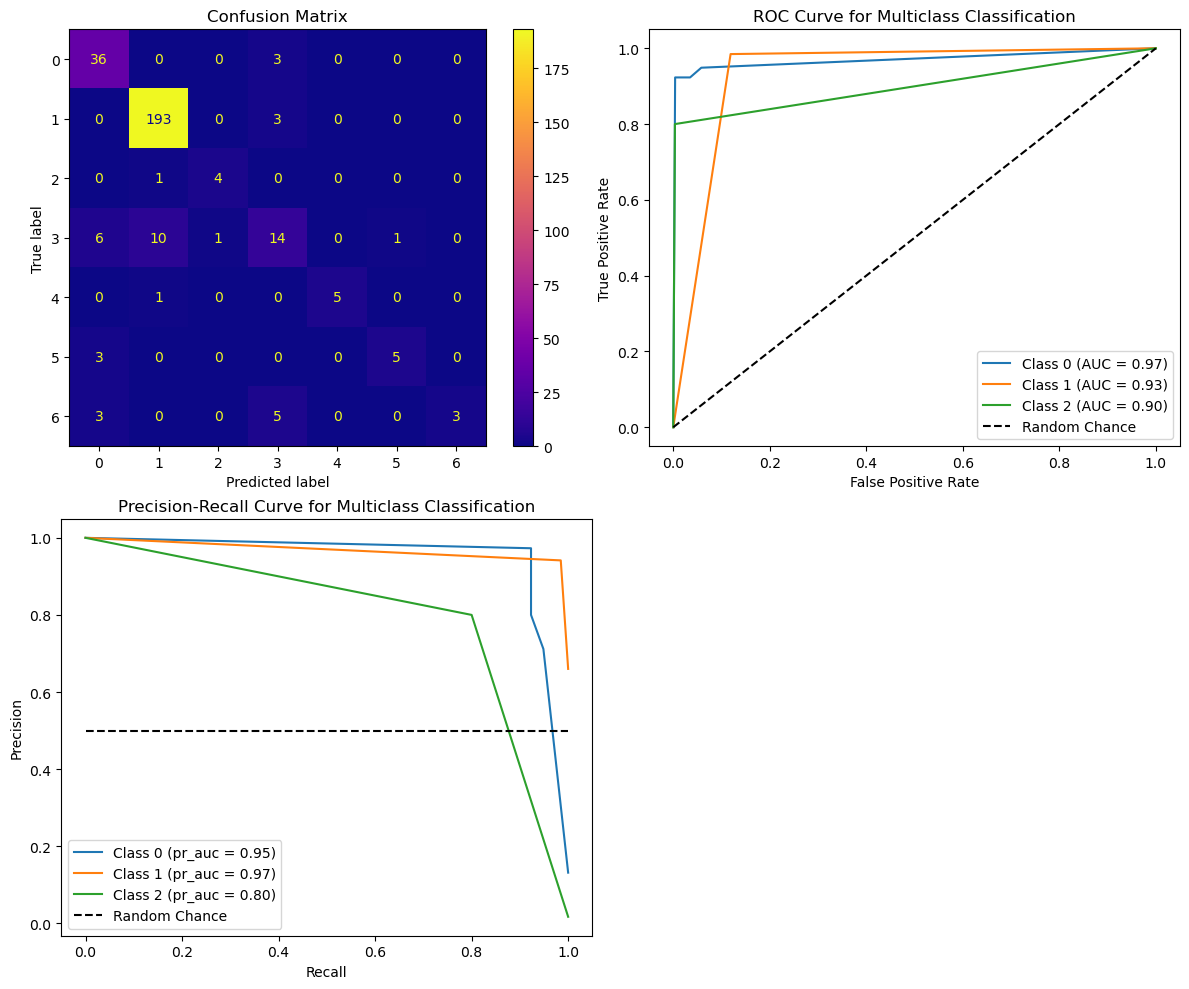

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='plasma', ax=axs[0, 0])  # Top-left subplot
axs[0, 0].set_title('Confusion Matrix')

# roc curve
for i in range(3): 
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    axs[0, 1].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

axs[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve for Multiclass Classification')
axs[0, 1].legend()

# precision-recall curve
for i in range(3): 
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    pr_auc = auc(recall, precision)
    axs[1, 0].plot(recall, precision, label=f'Class {i} (pr_auc = {pr_auc:.2f})')

axs[1, 0].plot([0, 1], [0.5, 0.5], 'k--', label='Random Chance')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('Precision-Recall Curve for Multiclass Classification')
axs[1, 0].legend()

axs[1, 1].axis('off')

plt.tight_layout()
#plt.savefig('dt_psych_graphs.jpg')
plt.show()


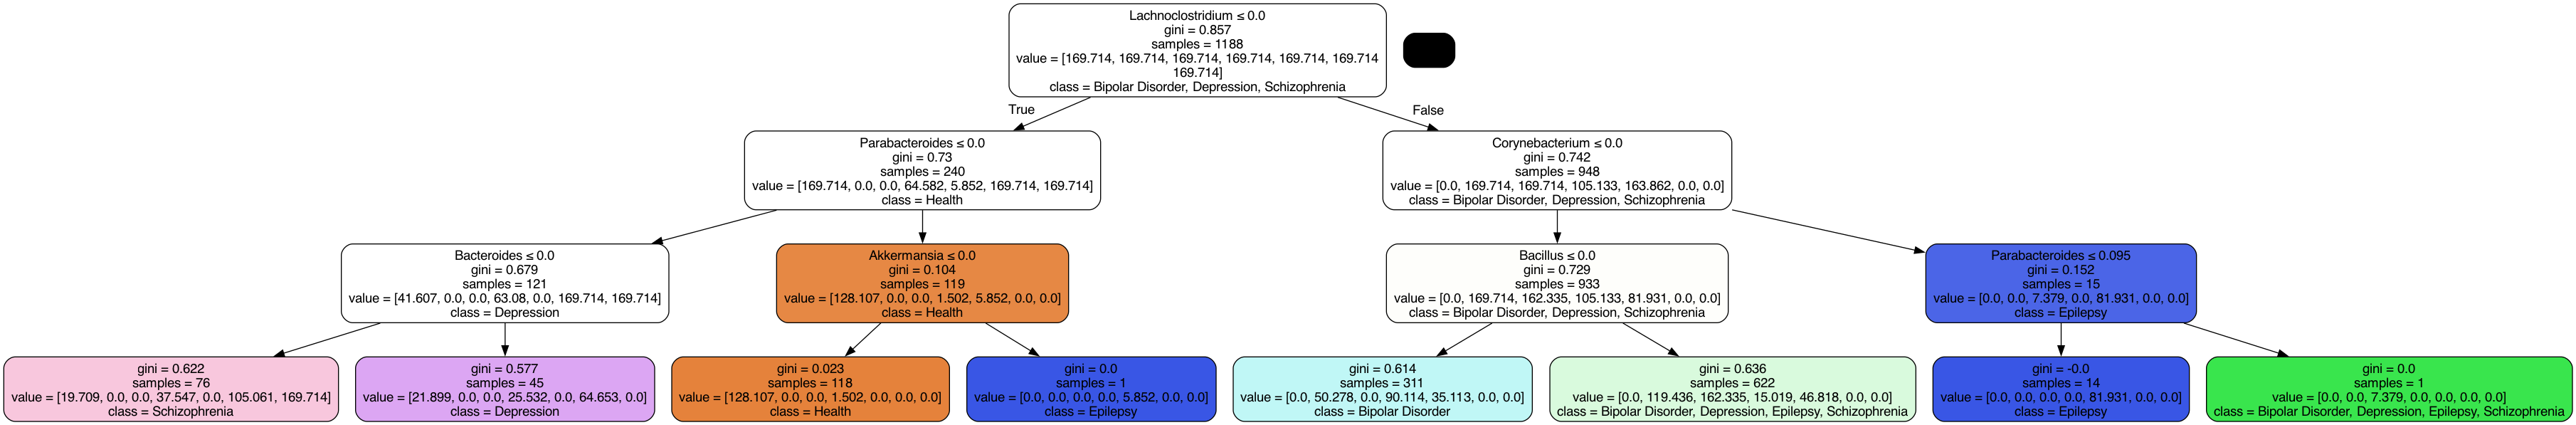

<Figure size 2000x1000 with 0 Axes>

In [38]:
plt.figure(figsize=(20, 10))
dt1 = DecisionTreeClassifier(criterion='gini', splitter='best', class_weight = 'balanced', 
                             max_depth=3, random_state=22)
dt1.fit(X_train, y_train)
dot_data = StringIO()
export_graphviz(dt1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=df_label_string)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('dt_psych_plot.jpg')
Image(graph.create_png())

In [37]:
dt1.feature_importances_

array([0.        , 0.07234694, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.29002953,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02649552, 0.        , 0.        , 0.1255791 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.34370636, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.14184256, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])